# Блок №7 Проект

В этом уроке применим линейную регрессию на практике – попробуем предсказать стоимость машин и понять, от каких факторов зависит ценообразование на автомобили. Помимо этого узнаем, какие переменные важны для прогнозирования и насколько хорошо полученная модель описывает [данные](https://stepik.org/media/attachments/lesson/387691/cars.csv). 

Задание:
1. Загрузите данные, проверьте правильность, наличие пропущенных значений, типы данных.
2. Создайте новый признак – марку автомобиля (company). Машины каких производителей встречаются в датасете? Далее исправьте названия и проверьте изменения.
3. Оставьте только часть предикторов, после чего посчитайте корреляцию между price и другими переменными.
4. Преобразуйте категориальные переменные с помощью pd.get_dummies(). 
5. Постройте модель с одним предиктором цены – horsepower. Какой процент изменчивости объясняет полученная модель? (\(R^2\))
6. Далее – две модели (со всеми предикторами и со всеми, кроме марок машин). Обратите внимание на изменения в \(R^2\), коэффициентах и их значимости. Какую модель лучше оставить? 
7. Заполните пропуски в результатах.

In [1]:
import pandas as pd
import numpy as np

import scipy.stats as ss
import statsmodels.api as sm
import statsmodels.formula.api as smf 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(rc={'figure.figsize':(16, 6)}, style='whitegrid')

# Задание 1
___
Загрузите данные, проверьте типы, пропущенные значения. 

Сколько пропущенных значений встретилось в датасете?

In [2]:
# Пути до файла
web_path = 'https://stepik.org/media/attachments/lesson/387691/cars.csv'
path = '/home/jupyter-a.stamati-16/Statistic/cars.csv'

In [13]:
cars = pd.read_csv(path)

In [5]:
# Посмртрим на данные
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
# Посмотрим на типы данных
cars.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [7]:
# Проверим наличие пустых значений
cars.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# Задание 2
___
Сгенерируем первый признак.

Использовать полное название машины – не самый хороший вариант, поэтому создадим новый признак – марку автомобиля (company). Для этого используйте столбец CarName, разбейте значения ячеек по пробелу и запишите в колонку первый элемент. Например:
```
'audi 100 ls' → 'audi'
```
Сколько всего уникальных марок машины встречается в датасете? Столбец CarName с полным названием машины удалите из датасета, а также car_ID, они не пригодятся для дальнейшего анализа.

In [14]:
# Создадим колонку с маркой машины
cars['company'] = cars.CarName \
                        .apply(lambda x: x.split(' ')[0])

In [15]:
# Допнем не нужные колонки
cars.drop(columns=['car_ID', 'CarName'], inplace=True)

In [16]:
# Посмотрим на результат
cars.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [17]:
# Найдем количество уникальных значений марок автомобиля
cars.company.nunique()

28

# Задание 3
___

Теперь внимательнее посмотрите на уникальные значения company. Часть из них оказалась с ошибками!

+ 'maxda' → 'mazda'
+ 'Nissan' → 'nissan'
+ 'porcshce' → 'porsche'
+ 'toyouta' → 'toyota'
+ 'vokswagen' & 'vw' → 'volkswagen'

Сколько уникальных производителей осталось в итоге?

In [18]:
# Посмотрим на уникальные значения марок автомобиля
cars \
    .company \
    .unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [19]:
# Исправим ошибки в названиях марок
cars['company'] = cars \
                    .company \
                    .str.lower() \
                    .replace('maxda', 'mazda') \
                    .replace('porcshce', 'porsche') \
                    .replace('toyouta', 'toyota') \
                    .replace('vokswagen', 'volkswagen') \
                    .replace('vw', 'volkswagen') \

In [20]:
# Посмотрим на результат
cars \
    .company \
    .unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [21]:
# Найдем количество уникальных марок автомобиля
cars.company.nunique()

22

# Задание 4
___
Отлично! Чтобы не перегружать модель большим количеством предикторов, оставим только часть из них:
```
'company', 'fueltype', 'aspiration','carbody', 'drivewheel', 'wheelbase', 'carlength','carwidth', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower'
```
также не забыв про то, что мы предсказываем – 'price'. 

После этого посчитайте корреляцию между price и другими переменными. Чему равна корреляция между price и horsepower? Ответ округлите до 2 знаков после точки.

In [27]:
# Оставим только нужные предикторые, отобрав колонки в датасете
cars_reg = cars[['price', 'company', 'fueltype', 'aspiration','carbody', 'drivewheel', 'wheelbase', 'carlength','carwidth', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower']]

In [28]:
cars_reg.head()

,price,company,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower
0,13495.0,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111
1,16500.0,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111
2,16500.0,alfa-romero,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154
3,13950.0,audi,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102
4,17450.0,audi,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115


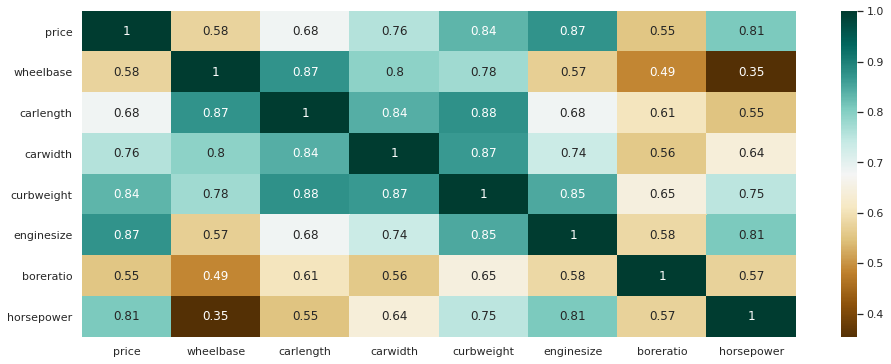

In [30]:
# Построим матрицу корреляцию
c = cars_reg.corr()
sns.heatmap(c, cmap="BrBG", annot=True);

In [33]:
# Найдем корреляцию между ценой и остальными предикторами
cars_reg.corr()['price'].sort_values(ascending=False).round(2)

price         1.00
enginesize    0.87
curbweight    0.84
horsepower    0.81
carwidth      0.76
carlength     0.68
wheelbase     0.58
boreratio     0.55
Name: price, dtype: float64

Ответ: 0.81

# Задание 5
___
Последний шаг в подготовке данных: линейная регрессия в python не справляется с категориальными переменными (типом object в pandas), поэтому давайте применим pd.get_dummies(). Пример использования:
```
df_dummy = pd.get_dummies(data=cars[[список_столбцов_типа_object]], drop_first = True)
```
Не забудьте присоединить к полученному датасету столбцы с переменными других типов :)
```
pd.concat([df_1, df_2], axis=1)
```
Сколько колонок теперь имеется в датасете?

In [49]:
# Посмотрим на типы данный в преобразованном датасете
cars_reg.dtypes

price             float64
company            object
fueltype           object
aspiration         object
carbody            object
drivewheel         object
wheelbase         float64
carlength         float64
carwidth          float64
curbweight          int64
enginetype         object
cylindernumber     object
enginesize          int64
boreratio         float64
horsepower          int64
dtype: object

In [50]:
cars_reg.shape

(205, 15)

In [51]:
# Отберем колонки в которых данные типа 'object'
cars_reg.select_dtypes(object).columns

Index(['company', 'fueltype', 'aspiration', 'carbody', 'drivewheel',
       'enginetype', 'cylindernumber'],
      dtype='object')

In [52]:
# Переведем эти данные в ранговый тип данных
cars_dummy = pd.get_dummies(data=cars_reg[['company', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber']], drop_first = True)

In [53]:
# Посмотрим на результат
cars_dummy.head()

,company_audi,company_bmw,company_buick,company_chevrolet,company_dodge,company_honda,company_isuzu,company_jaguar,company_mazda,company_mercury,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [54]:
# Отберем колонки, где формат данных не 'object'
cars_reg.select_dtypes([float, int]).columns

Index(['price', 'wheelbase', 'carlength', 'carwidth', 'curbweight',
       'enginesize', 'boreratio', 'horsepower'],
      dtype='object')

In [55]:
# соеденим все данные
cars_ob = pd.concat([cars_reg[['price', 'wheelbase', 'carlength', 'carwidth', 'curbweight',
       'enginesize', 'boreratio', 'horsepower']], cars_dummy], axis=1)

In [56]:
# Посмотрим на конечный результат
cars_ob.head()

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,company_audi,company_bmw,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,13495.0,88.6,168.8,64.1,2548,130,3.47,111,0,0,...,0,0,0,0,0,1,0,0,0,0
1,16500.0,88.6,168.8,64.1,2548,130,3.47,111,0,0,...,0,0,0,0,0,1,0,0,0,0
2,16500.0,94.5,171.2,65.5,2823,152,2.68,154,0,0,...,0,0,1,0,0,0,1,0,0,0
3,13950.0,99.8,176.6,66.2,2337,109,3.19,102,1,0,...,1,0,0,0,0,1,0,0,0,0
4,17450.0,99.4,176.6,66.4,2824,136,3.19,115,1,0,...,1,0,0,0,1,0,0,0,0,0


In [59]:
cars_ob.dtypes.value_counts()

uint8      41
float64     5
int64       3
dtype: int64

In [92]:
cars_ob.shape

(205, 49)

# Задание 6
___
Сначала построим небольшую модель всего с одним предиктором цены (price) – horsepower.

Какой процент изменчивости объясняет полученная модель?

In [60]:
# Строим модельс с одним предиктором
results = smf.ols('price ~ horsepower', cars_ob).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     382.2
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           1.48e-48
Time:                        14:02:20   Log-Likelihood:                -2024.0
No. Observations:                 205   AIC:                             4052.
Df Residuals:                     203   BIC:                             4059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3721.7615    929.849     -4.003      0.0

In [ ]:
# Ответ в R-squared * 100 и округленный до целого: 65

In [61]:
# Еще один способ построить регрессионную модель
# X = sm.add_constant(cars_ob['horsepower'])  # добавить константу, чтобы был свободный член
# Y = cars_ob['price'] # задаем ЗП
# model = sm.OLS(Y, X)  # говорим модели, что у нас ЗП, а что НП
# results = model.fit()  # строим регрессионную прямую
# print(results.summary())  # смотрим результат

# Задание 7
___
Теперь – две модели:
+ модель со всеми предикторами
+ модель со всеми предикторами, кроме марок машин

Обратите внимание на изменения в R^2, коэффициентах и их значимости. Какую модель лучше оставить? 

In [62]:
#  Выведем все названия колонок
cars_ob.columns

Index(['price', 'wheelbase', 'carlength', 'carwidth', 'curbweight',
       'enginesize', 'boreratio', 'horsepower', 'company_audi', 'company_bmw',
       'company_buick', 'company_chevrolet', 'company_dodge', 'company_honda',
       'company_isuzu', 'company_jaguar', 'company_mazda', 'company_mercury',
       'company_mitsubishi', 'company_nissan', 'company_peugeot',
       'company_plymouth', 'company_porsche', 'company_renault',
       'company_saab', 'company_subaru', 'company_toyota',
       'company_volkswagen', 'company_volvo', 'fueltype_gas',
       'aspiration_turbo', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object'

In [79]:
# Построим регрессионную модель со всеми предикторами
X = cars_ob.drop('price', axis='columns') # отбираем необходимые колонки
X = sm.add_constant(X)  # добавить константу, чтобы был свободный член
Y = cars_ob['price'] # задаем ЗП
model = sm.OLS(Y, X)  # говорим модели, что у нас ЗП, а что НП
results = model.fit()  # строим регрессионную прямую
print(results.summary())  # смотрим результат

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     81.09
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           4.86e-89
Time:                        14:17:16   Log-Likelihood:                -1804.2
No. Observations:                 205   AIC:                             3702.
Df Residuals:                     158   BIC:                             3858.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.472e+

In [76]:
# Отберем колонки без марок машин
coll_to_keep = cars_ob.columns[~cars_ob.columns.str.startswith('company_')]
coll_to_keep

Index(['price', 'wheelbase', 'carlength', 'carwidth', 'curbweight',
       'enginesize', 'boreratio', 'horsepower', 'fueltype_gas',
       'aspiration_turbo', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two'],
      dtype='object')

In [80]:
# Построим модель без марок машин
X = cars_ob[coll_to_keep].drop('price', axis='columns') # отбираем необхидимые колонки
X = sm.add_constant(X)  # добавить константу, чтобы был свободный член
Y = cars_ob['price'] # задаем ЗП
model = sm.OLS(Y, X)  # говорим модели, что у нас ЗП, а что НП
results = model.fit()  # строим регрессионную прямую
print(results.summary())  # смотрим результат

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     72.32
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           9.86e-81
Time:                        14:17:31   Log-Likelihood:                -1881.6
No. Observations:                 205   AIC:                             3817.
Df Residuals:                     178   BIC:                             3907.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -1.7e+

Ответ: Где меньше предикторов, ведь R2 изменился не очень сильно, а часть марок вообще не значима

# Задание 8

Заполните пропуски:

    Выбранная модель объясняет примерно ВЫБРАТЬ % дисперсии (окр. до целого). Среди предикторов ВЫБРАТЬ из 27 оказались не значимыми (p > 0.05). Пример интерпретации: при единичном изменении показателя horsepower, цена ВЫБРАТЬ на ВЫБРАТЬ (без округления).

Ответ:

    Выбранная модель объясняет примерно 90 % дисперсии (окр. до целого). Среди предикторов 10 из 27 оказались не значимыми (p > 0.05). Пример интерпретации: при единичном изменении показателя horsepower, цена ВОЗРАСТАЕТ на 86.8164 (без округления).